# Imports

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import datetime as dt

# BrentOilPrices

In [34]:
brent_prices = pd.read_csv('./Data para Proyecciones/BrentOilPrices.csv')
brent_prices.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [35]:
brent_prices.dtypes

Date      object
Price    float64
dtype: object

In [37]:
brent_prices.rename(mapper= str.lower, axis=1, inplace=True)
brent_prices.date = brent_prices.date.apply(lambda f: dt.datetime.strptime(f, '%d-%b-%y'))
brent_prices.head()

,date,price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [40]:
brent_prices = brent_prices.loc[brent_prices.date.dt.date >= dt.date(2010, 1, 1)]
brent_prices.head()

,date,price
5751,2010-01-04,79.05
5752,2010-01-05,79.27
5753,2010-01-06,80.14
5754,2010-01-07,80.57
5755,2010-01-08,80.06


In [41]:
plt.style.use('ggplot')

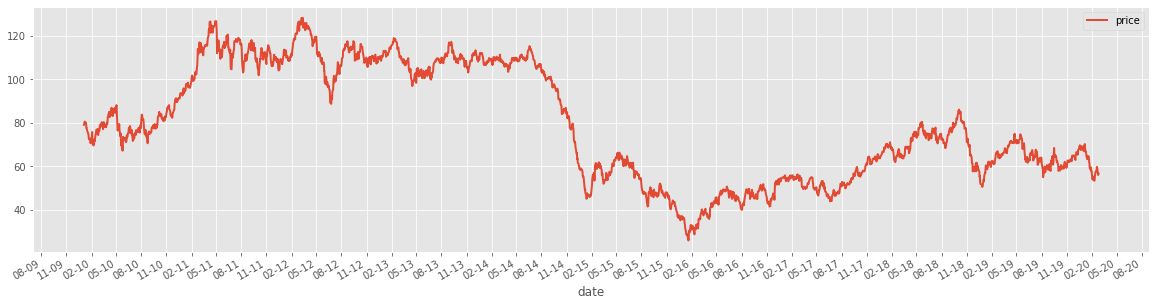

In [49]:
import matplotlib.dates as mdates

brent_prices.plot(x='date', y='price', lw=2, figsize=(20,5))

# Set the locator
locator = mdates.MonthLocator(interval=3)  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%m-%y')

plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(fmt)
plt.show()

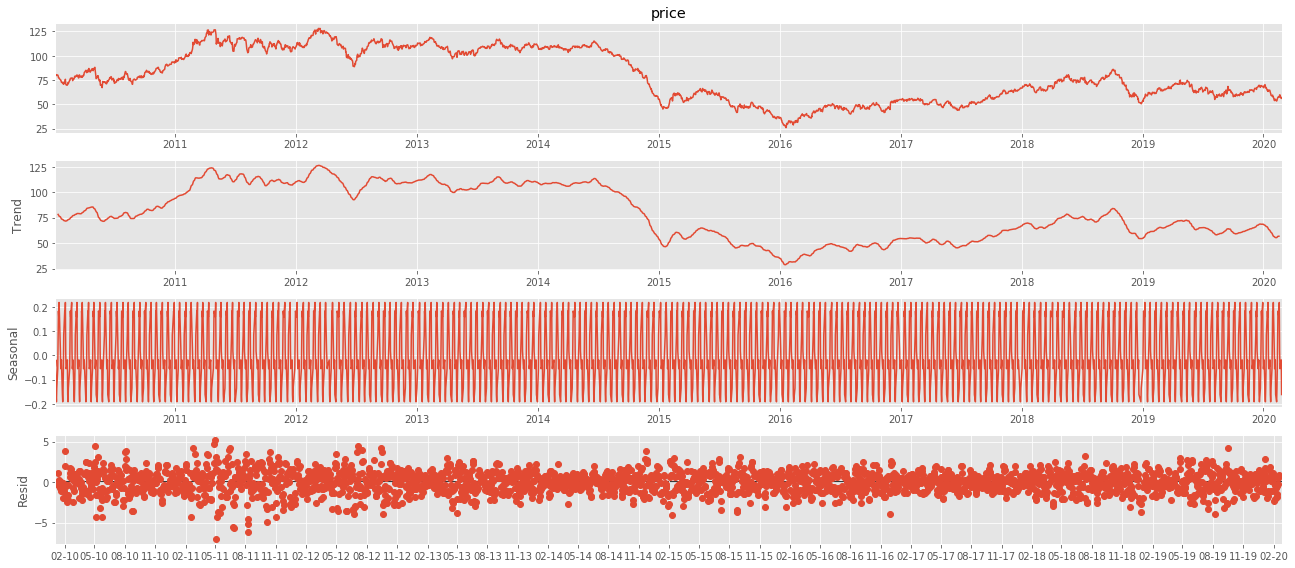

In [56]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8


decomposition = sm.tsa.seasonal_decompose(brent_prices.set_index('date')['price'], freq=12, model='additive')
decomposition.plot()
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(fmt)
plt.show()

### Busco mejor aproximación

In [57]:
import itertools

In [58]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [59]:
brent_prices.set_index('date', inplace=True)

In [60]:
y = brent_prices.resample('MS').mean() ## simil al Group by, con Month Start
y.head()

,price
date,
2010-01-01,76.167368
2010-02-01,73.752105
2010-03-01,78.827391
2010-04-01,84.817619
2010-05-01,75.945500


In [64]:
results_df = pd.DataFrame()
data = {}


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            data['p'] = pdq[0]
            data['d'] = pdq[1]
            data['q'] = pdq[2]
            
            data['s_p'] = param_seasonal[0]
            data['s_d'] = param_seasonal[1]
            data['s_q'] = param_seasonal[2]
            
            data['AIC'] = results.aic
            
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1416.0143545492265
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1172.0643001961525
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:992.042154902987
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:868.6505805324698
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:998.62690373955
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:988.5388925136249
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:877.959271637494
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:869.8879534943104
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1247.1716916648163
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1025.805768503184
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:866.9301990663074
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:763.0300223173217
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:882.2090289211512
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:867.9304086831121
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:777.0339509092311
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:763.8001609805457
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:751.3310520372352
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:678.8367660930078
ARIMA(0, 1,

In [66]:
results_df = pd.DataFrame(data=data)

In [67]:
results_df.loc[results_df.AIC == results_df.AIC.min()]

,p,d,q,s_p,s_d,s_q,AIC
0,0,0,0,1,1,1,618.739029
1,0,0,1,1,1,1,618.739029
2,0,1,0,1,1,1,618.739029


## para cada parámetro de SARIMAX, ploteo y me fijo el que mejor ajusta

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0456      0.294      0.155      0.877      -0.530       0.621
ma.S.L12       0.1930      0.312      0.619      0.536      -0.418       0.804
sigma2       429.5932     48.538      8.851      0.000     334.460     524.726


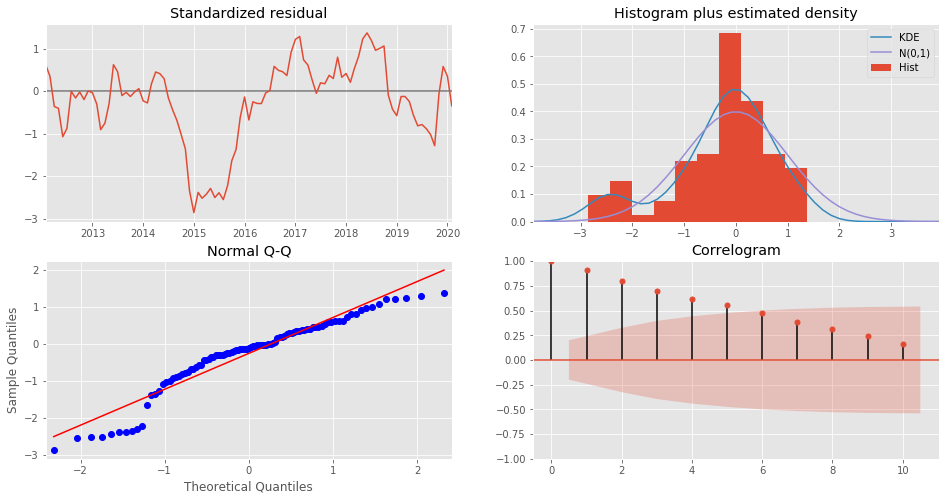

In [92]:
## ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:251.2470775508367 es el MVP

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 0, 0),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

results.plot_diagnostics(figsize=(16, 8))
plt.show()

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.0833      0.046     23.386      0.000       0.993       1.174
ar.S.L12       0.0073      0.024      0.299      0.765      -0.040       0.055
ma.S.L12       0.0478      0.134      0.358      0.720      -0.214       0.309
sigma2       130.1366     19.721      6.599      0.000      91.484     168.789


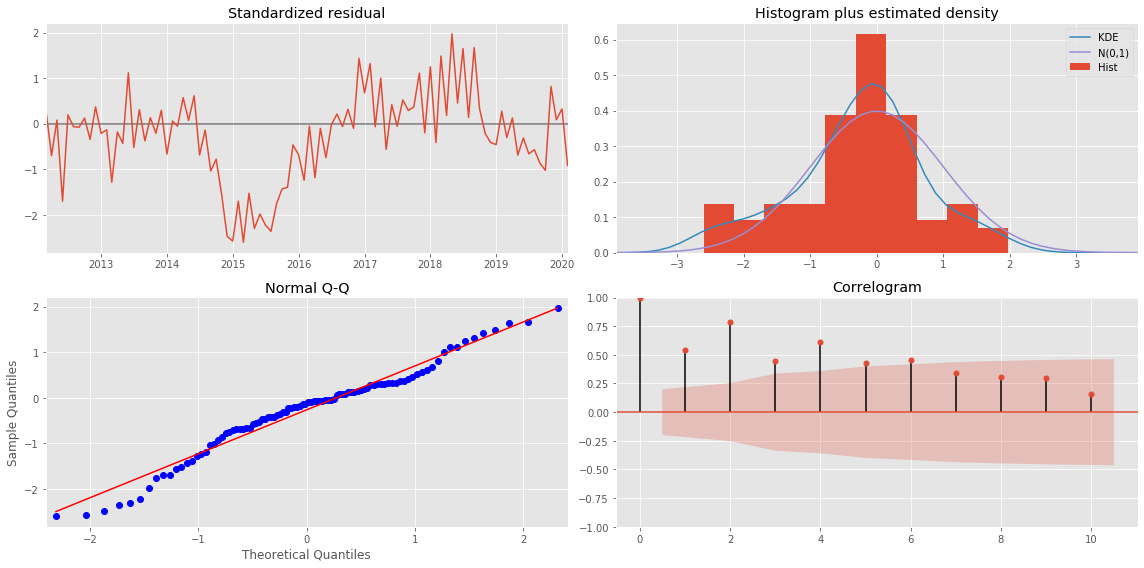

In [93]:
## ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:251.2470775508367 es el MVP

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

results.plot_diagnostics(figsize=(16, 8))

plt.show()

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0016      0.018      0.089      0.929      -0.034       0.037
ma.S.L12      -0.9272      0.382     -2.424      0.015      -1.677      -0.178
sigma2        34.1320     12.500      2.730      0.006       9.631      58.632


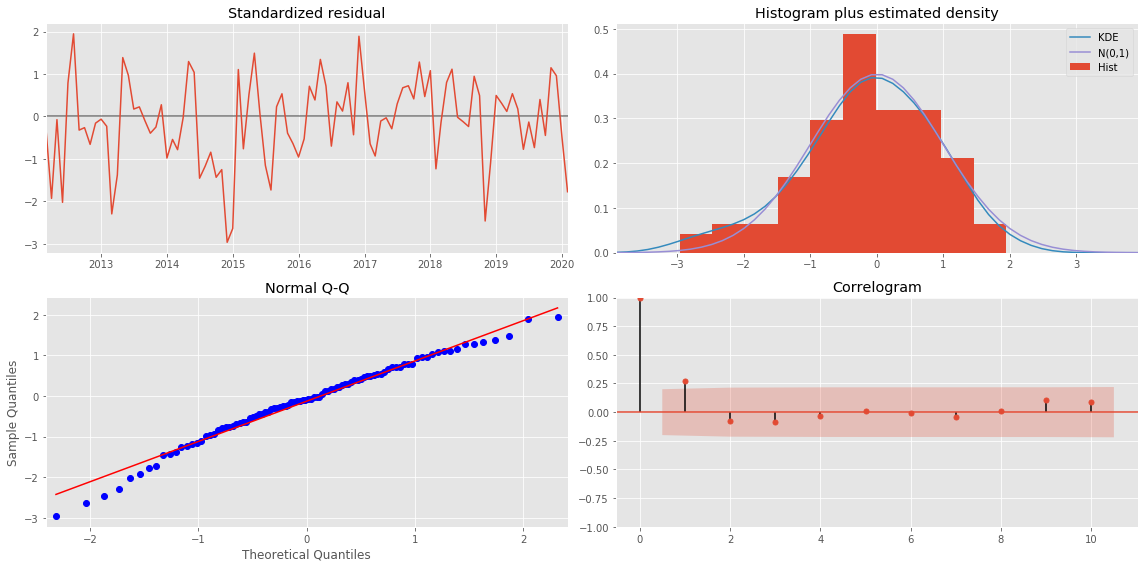

In [94]:
## ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:251.2470775508367 es el MVP

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

results.plot_diagnostics(figsize=(16, 8))
plt.tight_layout()
plt.savefig('./graficos/analisis_residual_prediccion_BRENT.jpg')


plt.show()

**El modelo SARIMAX que mejor aproxima es el (0, 1, 0) x (1,1,1)12**

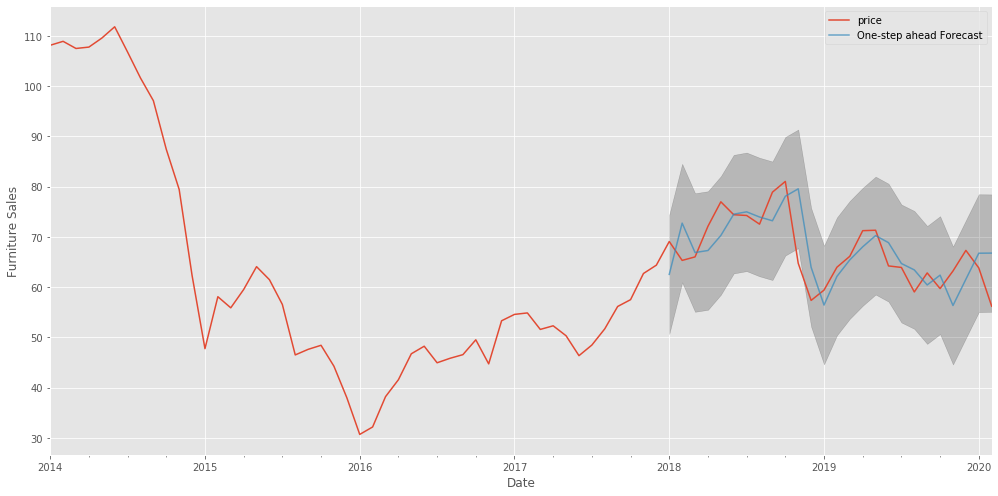

In [95]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.tight_layout()
plt.savefig('./graficos/prediccion_SARIMAX_BRENT.jpg')

plt.show()

# Indice de Produccion Industrial

In [108]:
ipi_ts = pd.read_csv('./Data para Proyecciones/indice_produccion_industrial_uia.csv')
ipi_ts.head()

,indice_tiempo,valor
0,2014-01-01,124.1
1,2014-02-01,127.2
2,2014-03-01,138.6
3,2014-04-01,144.1
4,2014-05-01,143.2


In [109]:
ipi_ts.rename({'indice_tiempo':'date'}, axis=1, inplace=True)

ipi_ts.date = ipi_ts.date.apply(lambda f: dt.datetime.strptime(f, '%Y-%m-%d'))
ipi_ts.set_index('date', inplace=True)
ipi_ts.head()

,valor
date,
2014-01-01,124.1
2014-02-01,127.2
2014-03-01,138.6
2014-04-01,144.1
2014-05-01,143.2


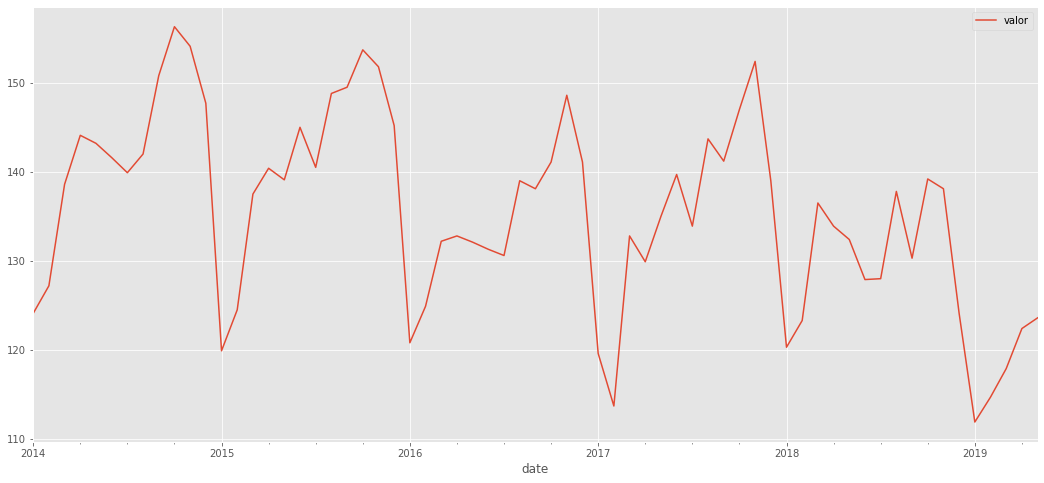

In [110]:
ipi_ts.plot()

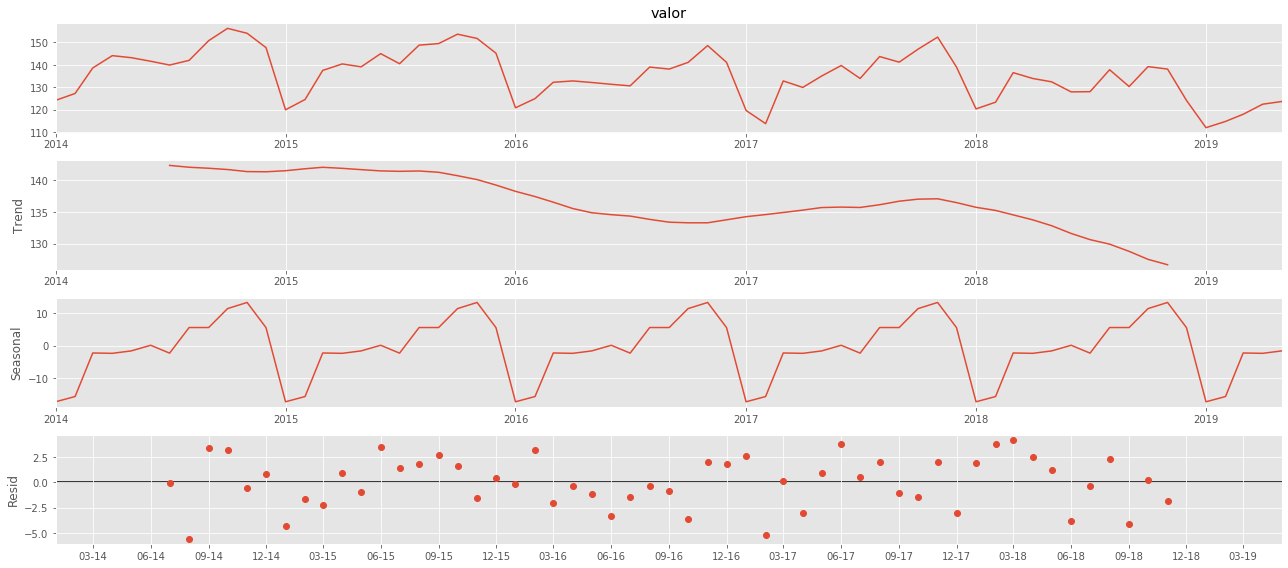

In [111]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8


decomposition = sm.tsa.seasonal_decompose(ipi_ts.valor, freq=12, model='additive')
decomposition.plot()
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(fmt)

plt.tight_layout()
plt.savefig('./graficos/analisis_ARIMA_IPI.jpg')

In [112]:
results_df = pd.DataFrame()
data = {}


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ipi_ts.valor,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            data['p'] = pdq[0]
            data['d'] = pdq[1]
            data['q'] = pdq[2]
            
            data['s_p'] = param_seasonal[0]
            data['s_d'] = param_seasonal[1]
            data['s_q'] = param_seasonal[2]
            
            data['AIC'] = results.aic
            
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:812.5491555050701
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:618.5063531418334
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:358.7740207873712
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:283.35461226718564
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:351.1675986462527
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:319.61489014251833
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:284.69052089250437
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:279.18665681643233
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:721.7520294938859
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:544.1512153999568
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:330.8291389391369
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:259.35671967925737
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:333.0304419077361
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:326.99268106343317
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:269.1131086290707
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:259.8679571500038
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:454.084180557258
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:344.6179000607209
ARIMA

In [113]:
results_df = pd.DataFrame(data=data)

In [114]:
results_df.loc[results_df.AIC == results_df.AIC.min()]

,p,d,q,s_p,s_d,s_q,AIC
0,0,0,0,1,1,1,231.068642
1,0,0,1,1,1,1,231.068642
2,0,1,0,1,1,1,231.068642


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0223      0.144     -0.156      0.876      -0.304       0.259
ma.S.L12      -0.6961      0.444     -1.568      0.117      -1.566       0.174
sigma2        21.4763      8.036      2.672      0.008       5.725      37.228


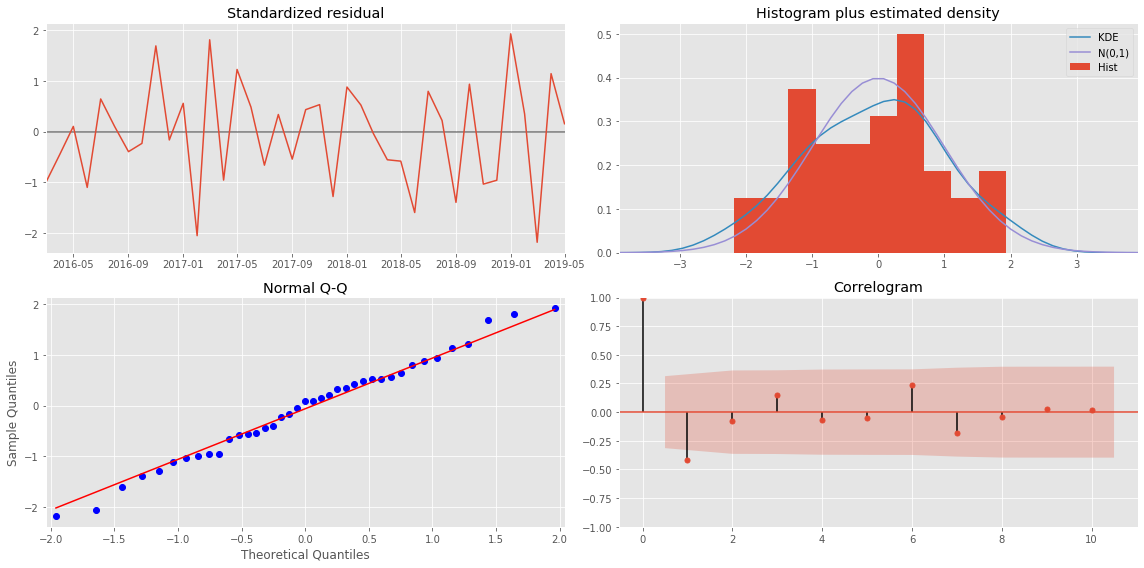

In [115]:
## ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:251.2470775508367 es el MVP

mod = sm.tsa.statespace.SARIMAX(ipi_ts.valor,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

results.plot_diagnostics(figsize=(16, 8))
plt.tight_layout()
plt.savefig('./graficos/analisis_residual_prediccion_IPI.jpg')
plt.show()

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.9170      0.415     -2.208      0.027      -1.731      -0.103
ma.S.L12       2.7089      3.511      0.771      0.440      -4.173       9.591
sigma2         7.0836     18.489      0.383      0.702     -29.154      43.321


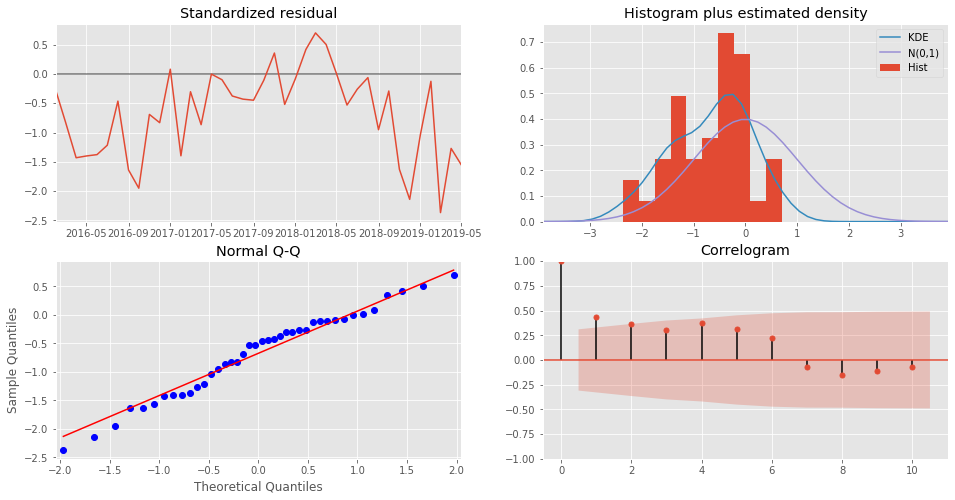

In [116]:
## ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:251.2470775508367 es el MVP

mod = sm.tsa.statespace.SARIMAX(ipi_ts.valor,
                                order=(0, 0, 0),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

results.plot_diagnostics(figsize=(16, 8))
plt.show()

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5414      0.151      3.596      0.000       0.246       0.837
ar.S.L12      -0.5123      0.372     -1.376      0.169      -1.242       0.217
ma.S.L12       0.0825      0.442      0.187      0.852      -0.784       0.949
sigma2        37.2537      9.314      4.000      0.000      18.999      55.509


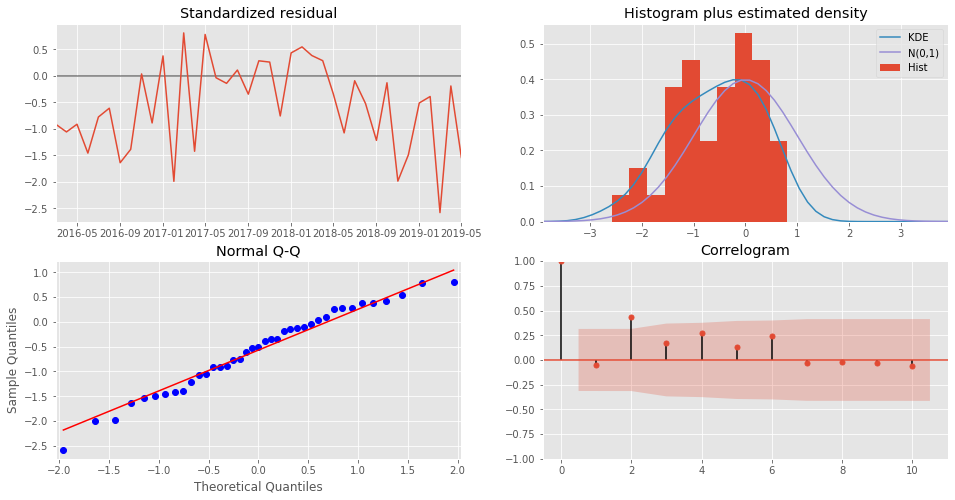

In [117]:
## ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:251.2470775508367 es el MVP

mod = sm.tsa.statespace.SARIMAX(ipi_ts.valor,
                                order=(0, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

results.plot_diagnostics(figsize=(16, 8))
plt.show()

**El mejor SARIMAX vuelve a ser el (0,1,0)x(1,1,1)12**

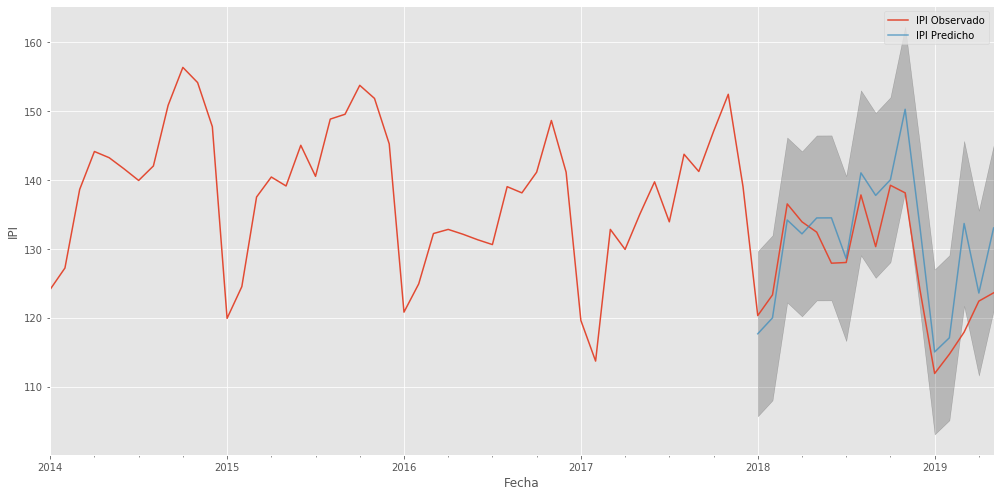

In [118]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = ipi_ts.valor['2014':].plot(label='IPI Observado')
pred.predicted_mean.plot(ax=ax, label='IPI Predicho', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Fecha')
ax.set_ylabel('IPI')
plt.legend()
plt.tight_layout()
plt.savefig('./graficos/prediccion_SARIMAX_IPI.jpg')

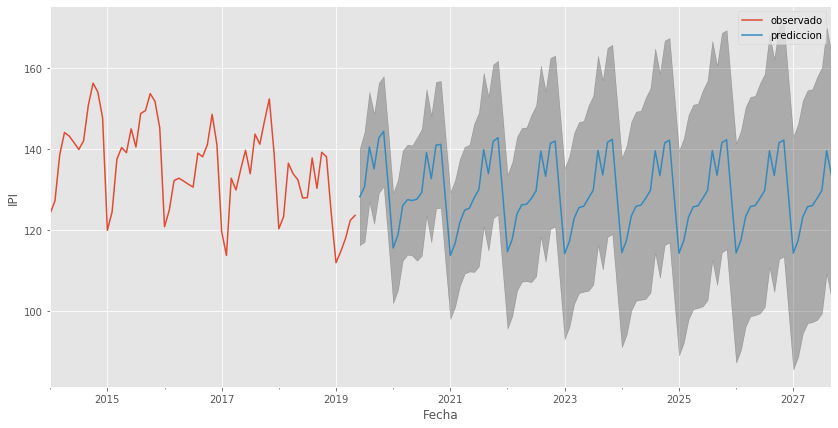

In [119]:
## Generalizando
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = ipi_ts.valor.plot(label='observado', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='prediccion')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('IPI')
plt.legend()
plt.show()

# EMAE mensual

In [132]:
emae_ts = pd.read_excel('./Data para Proyecciones/EMAE_mensual_v1.xls', usecols='G:N', skiprows=23, nrows=180 )
emae_ts

,100.71881442067479,n.c..2,101.87373820988374,n.c..3,103.71774864547531,n.c..4,101.86557011588344,n.c..5
0,101.197310,0.489363,97.298369,6.389791,109.064218,9.153743,105.317046,9.776099
1,93.223411,-2.296069,94.707846,5.907747,99.192425,6.780871,109.014691,10.279166
2,101.591248,1.336854,107.569737,6.056906,107.908977,3.988396,114.231074,10.770032
3,99.125236,2.510600,107.551657,9.259035,103.211166,6.392461,108.787384,13.538408
4,104.305515,0.196907,109.435990,9.050889,108.038706,5.432596,111.055134,13.327848
...,...,...,...,...,...,...,...,...
175,91.409194,3.891176,124.017109,-6.693947,143.345917,-3.888015,153.136630,-5.205506
176,88.247288,2.073635,116.874056,-5.124881,132.231981,-0.449206,139.402843,-6.596734
177,91.366427,3.088393,128.510952,-2.046627,136.999570,2.560131,133.227202,-8.893863
178,87.064914,2.471733,118.806314,-4.765595,136.609575,4.104505,130.540139,-7.427652


In [133]:
emae_ts.columns = ['mineria', 'var_p_mineria', 'manufactura', 'var_p_manufactura', 'energia', 'var_p_energia', 'construccion', 'var_p_construccion']
emae_ts.head()

,mineria,var_p_mineria,manufactura,var_p_manufactura,energia,var_p_energia,construccion,var_p_construccion
0,101.197310,0.489363,97.298369,6.389791,109.064218,9.153743,105.317046,9.776099
1,93.223411,-2.296069,94.707846,5.907747,99.192425,6.780871,109.014691,10.279166
2,101.591248,1.336854,107.569737,6.056906,107.908977,3.988396,114.231074,10.770032
3,99.125236,2.510600,107.551657,9.259035,103.211166,6.392461,108.787384,13.538408
4,104.305515,0.196907,109.435990,9.050889,108.038706,5.432596,111.055134,13.327848


In [134]:
emae_ts.head(20)

,mineria,var_p_mineria,manufactura,var_p_manufactura,energia,var_p_energia,construccion,var_p_construccion
0,101.197310,0.489363,97.298369,6.389791,109.064218,9.153743,105.317046,9.776099
1,93.223411,-2.296069,94.707846,5.907747,99.192425,6.780871,109.014691,10.279166
2,101.591248,1.336854,107.569737,6.056906,107.908977,3.988396,114.231074,10.770032
3,99.125236,2.510600,107.551657,9.259035,103.211166,6.392461,108.787384,13.538408
4,104.305515,0.196907,109.435990,9.050889,108.038706,5.432596,111.055134,13.327848
5,99.494746,-1.175141,107.965141,7.249859,106.263750,4.271009,111.981828,12.934107
6,104.128664,3.300461,108.632705,5.974304,112.653868,6.865458,108.845650,10.049595
7,102.779768,0.495001,109.721889,8.623769,111.991176,7.706799,113.680843,11.415967
8,98.041092,-2.528219,108.689219,5.973419,105.810640,8.350023,117.976418,10.449167
9,96.293876,-5.028814,114.314172,7.939596,98.783314,2.698675,113.891616,16.403471


In [159]:
idx = pd.date_range(start='2005-01-01', periods=emae_ts.shape[0], freq='M').format(formatter=lambda x: x.strftime('%y-%m'))

emae_ts = emae_ts.set_index(pd.Series(idx))

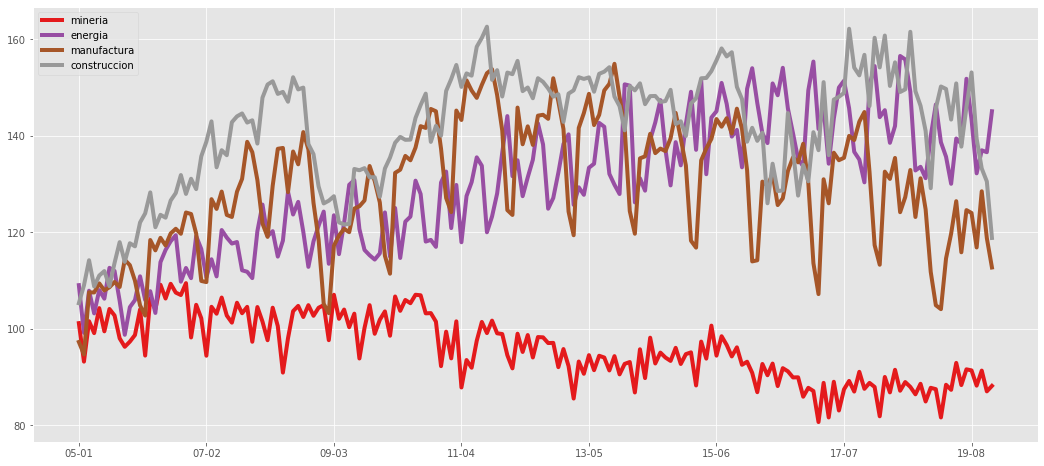

In [205]:
emae_ts.plot(y=['mineria', 'energia', 'manufactura', 'construccion'],
             lw=4,
#              color=['tomato', 'green', 'gold', 'navy'],
             cmap='Set1')
# plt.gca().xaxis.set_major_locator(locator)
# plt.gca().xaxis.set_major_formatter(fmt)

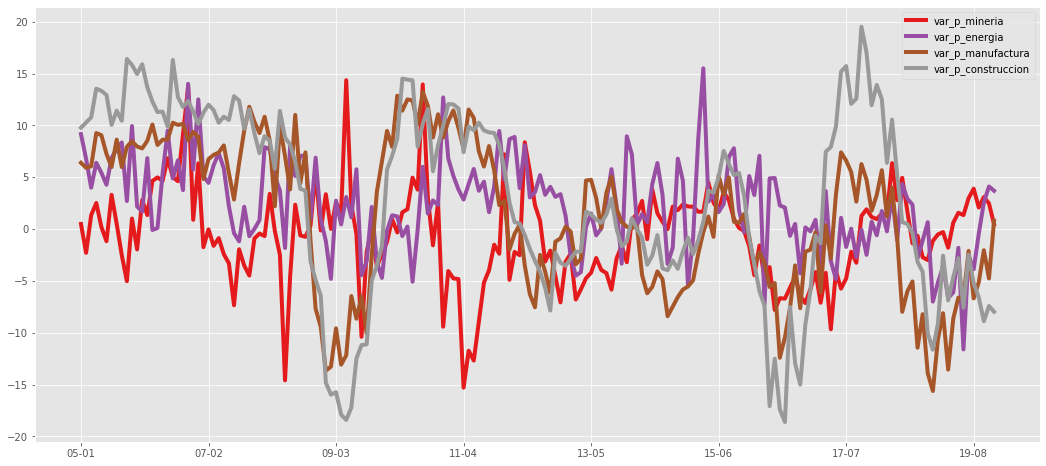

In [225]:
emae_ts.plot(y=['var_p_mineria', 'var_p_energia', 'var_p_manufactura', 'var_p_construccion'],
             lw=4,
#              color=['tomato', 'green', 'purple', 'navy'],
             cmap='Set1'
            )


In [227]:
emae_ts_mineria = emae_ts['mineria']
emae_ts_mineria_var_p = emae_ts['var_p_mineria']

In [228]:
emae_ts_construccion = emae_ts['construccion']
emae_ts_construccion_var_p = emae_ts['var_p_construccion']

In [229]:
emae_ts_manufactura = emae_ts['manufactura']
emae_ts_manufactura_var_p = emae_ts['var_p_manufactura']

In [230]:
emae_ts_energia = emae_ts['energia']
emae_ts_energia_var_p = emae_ts['var_p_energia']

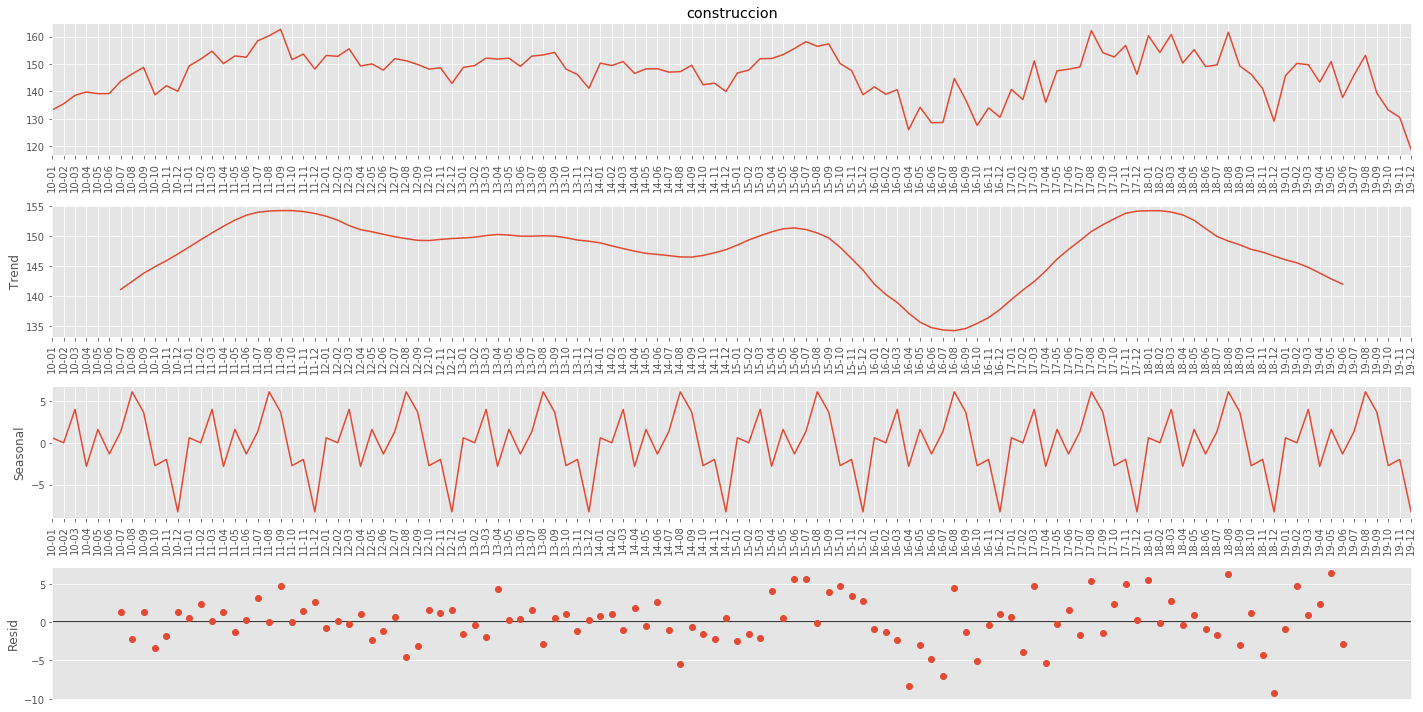

In [281]:
def decompose_series(series, freq=12, model='additive'):
    rcParams['figure.figsize'] = 20, 10

    decomposition = sm.tsa.seasonal_decompose(series, freq=freq, model=model)
    fig = decomposition.plot()
    plt.gca().xaxis.set_major_locator(locator)
    plt.gca().xaxis.set_major_formatter(fmt)
    plt.tight_layout()
    for ax in fig.axes:
        ax.tick_params(axis='x', labelrotation=90)


decompose_series(emae_ts_construccion['10-01':])
plt.tight_layout()
plt.savefig('./graficos/analisis_ARIMA_EMAE_construccion.jpg')

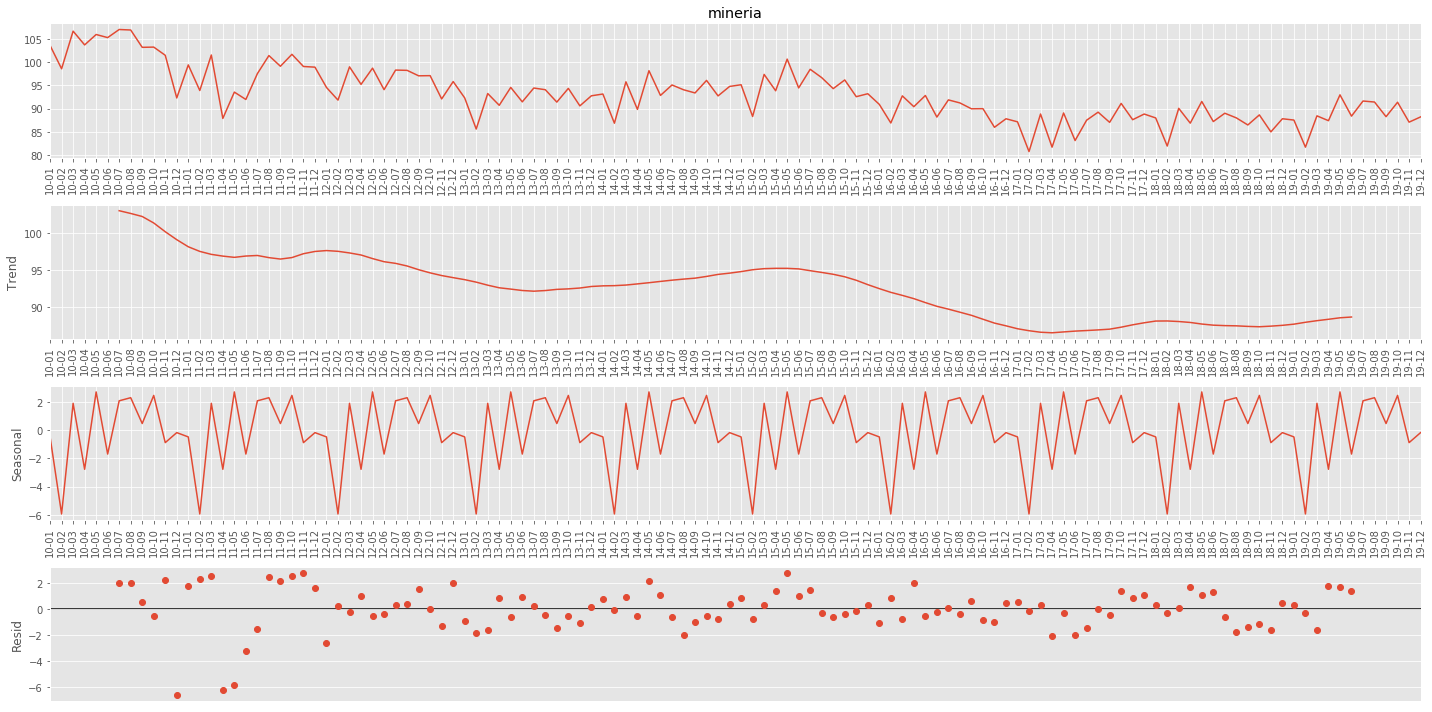

In [282]:
decompose_series(emae_ts_mineria['10-01':])
plt.tight_layout()
plt.savefig('./graficos/analisis_ARIMA_EMAE_mineria.jpg')

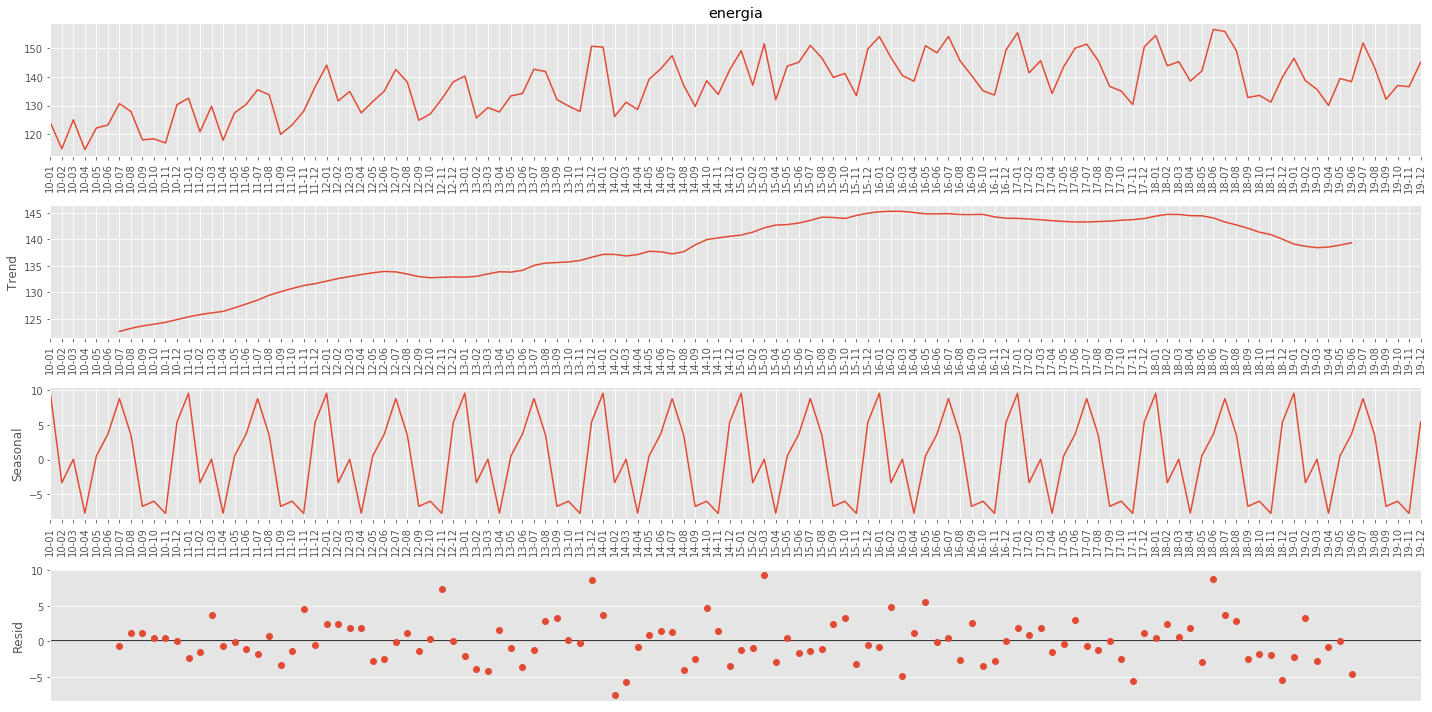

In [283]:
decompose_series(emae_ts_energia['10-01':])
plt.tight_layout()
plt.savefig('./graficos/analisis_ARIMA_EMAE_energia.jpg')

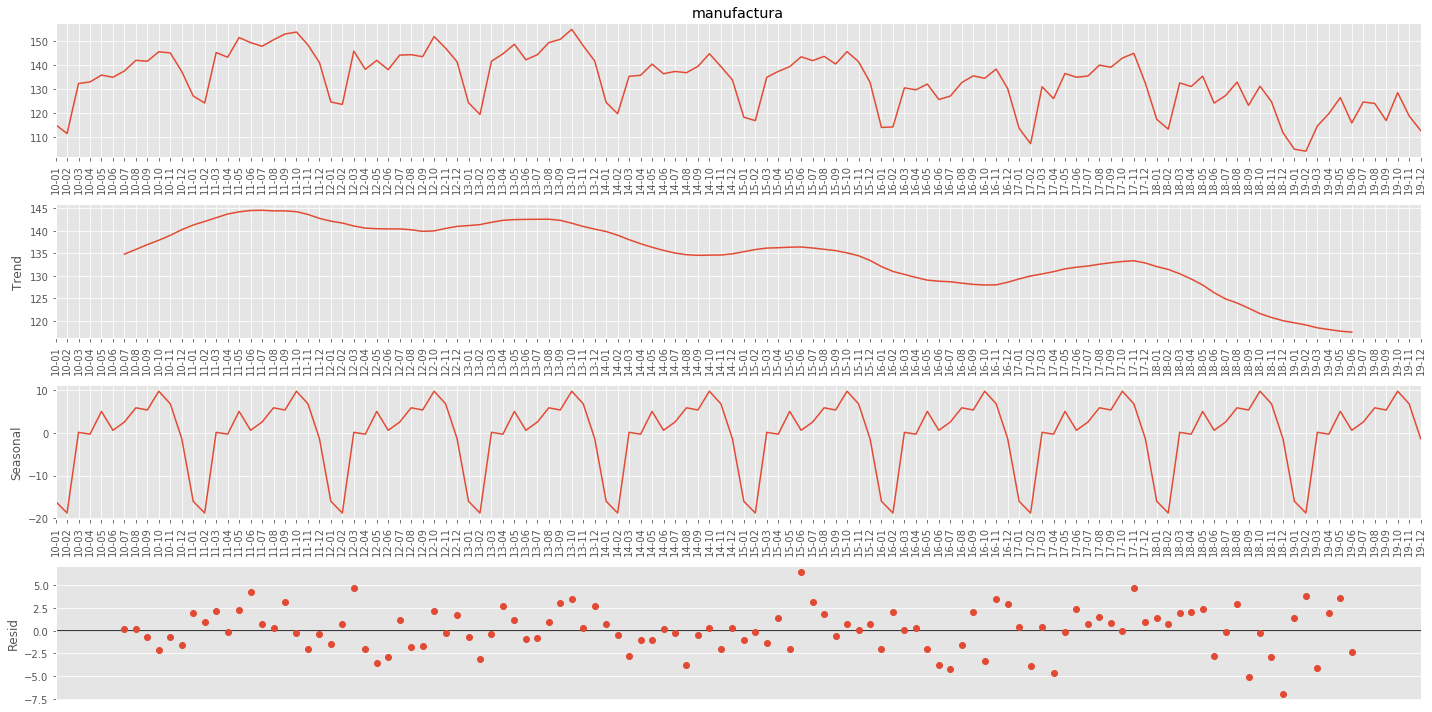

In [284]:
decompose_series(emae_ts_manufactura['10-01':])
plt.tight_layout()
plt.savefig('./graficos/analisis_ARIMA_EMAE_manufactura.jpg')

# ISAC Construccion

In [2]:
import pandas as pd

In [13]:
isac = pd.read_csv('./Data para Proyecciones/indicador-sintetico-actividad-construccion-valores-mensuales-base-2004.csv')
isac.head()

,indice_tiempo,isac_nivel_general,isac_variacion_interanual,isac_sin_estacionalidad,isac_ciclo_tendencia
0,2012-01-01,169.907120,NaN,183.766710,176.982617
1,2012-02-01,151.766779,NaN,175.058907,176.157297
2,2012-03-01,188.202240,NaN,182.215096,175.245087
3,2012-04-01,164.243978,NaN,171.646239,174.301598
4,2012-05-01,175.191570,NaN,173.418205,173.416902


In [14]:
isac = isac[['indice_tiempo', 'isac_sin_estacionalidad']]
isac.isac_sin_estacionalidad = isac.isac_sin_estacionalidad.astype(float)
isac.head()

,indice_tiempo,isac_sin_estacionalidad
0,2012-01-01,183.766710
1,2012-02-01,175.058907
2,2012-03-01,182.215096
3,2012-04-01,171.646239
4,2012-05-01,173.418205


In [15]:
plt.style.use('ggplot')

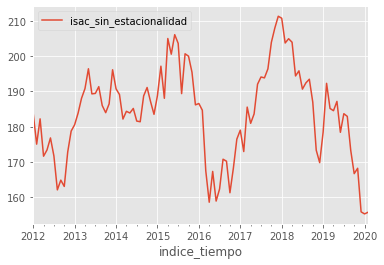

In [16]:
isac.indice_tiempo = isac.indice_tiempo.apply(lambda f: dt.datetime.strptime(f, '%Y-%m-%d'))
isac.set_index('indice_tiempo', inplace=True)
isac.plot()

Text(0, 0.5, 'ISAC')

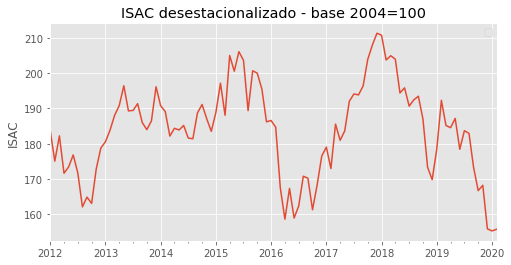

In [21]:
isac.plot(figsize=(8,4))
plt.title('ISAC desestacionalizado - base 2004=100')
plt.xlabel('')
plt.legend('')
plt.ylabel('ISAC')